# Ejercicio: recortar y unir imágenes

(512, 512, 3)


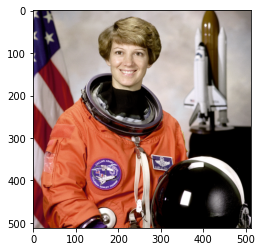

In [134]:
from skimage import data

%matplotlib inline

img = data.astronaut()
print(img.shape)
plt.imshow(img)

In [210]:
#creacion de piezas
import numpy as np

def pieces(im,tile):
    h0,w0,_ = img.shape
    h,w = h0//tile, w0//tile

    img2 = img[:h*tile, :w*tile]

    piezas = [np.split(x, h, axis=1) for x in np.split(img2, w)]
    piezas = sum(piezas,[])
    return piezas

piezas = pieces(img,100)

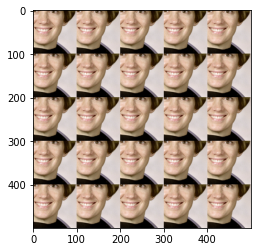

In [212]:
from random import randint as rnd

def grid(im,n):
    xs = np.vstack([im]*n) #xs = concatenacion de im, repetida n veces, a lo largo del eje vertical
    xss = np.hstack([xs]*n) #xss = concatenacion de xs, repetida n veces, a lo largo del eje horizontal
    return xss

plt.imshow(grid(piezas[rnd(0,len(piezas)-1)],5))

## Si la cámara tiene resolución de H pix x W pix y f= F pix. ¿A qué distancia debemos ponerla para que abarque completamente una escena de M metros de ancho?

In [216]:
import math

def imgcalc(h,w,f,m):
    print('====================== DATOS ======================')
    print('Imagen de',h,'x',w,'pixels')
    print('Distancia focal f =',f,'pixels')
    print('Ancho de la escena capturada =',m,'metros')
    print('===================================================')
    print()
    FOV = math.atan((w/2)/f)*2
    print('FOV =', math.degrees(FOV), 'grados')
    x = (m/2) / math.tan(FOV/2)
    print('Distancia =', x, 'metros')
    return FOV,x
    
h,w,f,m = 800,600,1000,28
    
FOV,x = imgcalc(h,w,f,m)

====================== DATOS ======================
Imagen de 800 x 600 pixels
Distancia focal f = 1000 pixels
Ancho de la escena capturada = 28 metros

FOV = 33.39848846798724 grados
Distancia = 46.66666666666667 metros


### Teniendo en cuenta un diámetro de 0.24 m para una pelota de baloncesto, ¿qué longitud en pixels tendrá?

In [224]:
p = f*0.24/x
p #en pixels

5.142857142857142

### ¿A qué distancia estará la pelota si se ve con un diámetro de 15 pix?

In [218]:
d = f*0.24/15
d #en metros

16.0